# Preditor de Espécies da Flor Íris

<img src="images/iris_dataset_banner.png" width="100%">

## Visão geral e objetivos

Iris é um género de plantas com flor, muito apreciado pelas suas diversas espécies, que ostentam flores de cores muito vivas. São, vulgarmente, designadas como lírios, embora tal termo se aplique com mais propriedade a outro tipo de flor. É uma flor muito frequente em jardins. O conjunto de dados da flor Iris é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de 1936 que quantifica a variação morfológica das flores da íris de três espécies relacionadas. O conjunto de dados, disponível no [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris?spm=a2c4e.11153940.blogcont603256.5.333b1d6f05ZggC), consiste em 150 amostras de cada uma das três espécies de Iris ( Iris setosa, Iris virginica e Iris versicolor ). Quatro variáveis foram medidas em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros (Fonte: Wikipedia: [Conjunto de dados flor Iris](https://pt.wikipedia.org/wiki/Conjunto_de_dados_flor_Iris)). Considerando este conjunto de dados, deseja-se construir uma aplicação web que auxilie botânicos e floriculturistas a classificar de forma mais precisa é mais rápida uma Iris data as medidas da sépala é da pétala.

<h1>Passo 1: Setup do Projeto</h1>

In [1]:
import joblib
import os
import urllib

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

In [19]:
print('Matplot version : {}'.format(matplotlib.__version__))
print('Numpy version : {}'.format(np.__version__))
print('Pandas version : {}'.format(pd.__version__))

Matplot version : 3.3.2
Numpy version : 1.19.2
Pandas version : 1.1.3


In [3]:
IRIS_ROOT = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/"
IRIS_URL = IRIS_ROOT + "iris.data"

DATA_PATH = os.path.join('..','data','raw')
DATA_FILE = "iris.csv"
IRIS_DATA = os.path.join(DATA_PATH,DATA_FILE)

DEPLOY_PATH = os.path.join('..','app','model')
DEPLOY_FILE = 'finalized_model.sav'

<h1>Passo 2: Recuperação dos Dados</h1>

In [4]:
def download_data(data_url,data_path,data_file):
    os.makedirs(data_path, exist_ok=True)
    local_path = os.path.join(data_path,data_file)
    urllib.request.urlretrieve(data_url,local_path)

In [5]:
download_data(IRIS_URL,DATA_PATH,DATA_FILE)

In [6]:
def load_data(data_path, data_file):
    local_path = os.path.join(data_path,data_file)
    return pd.read_csv(local_path, header=None,names=['sepal_length','sepal_width','petal_length','petal_width','class'])

In [7]:
iris_data = load_data(DATA_PATH,DATA_FILE)

<h1>Passo 3: Análise Exploratória de dados</h1>

In [8]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
iris_data['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

## Correlação e distribuição

In [11]:
x = iris_data[['sepal_length','sepal_width','petal_length','petal_width']]
y = iris_data['class']

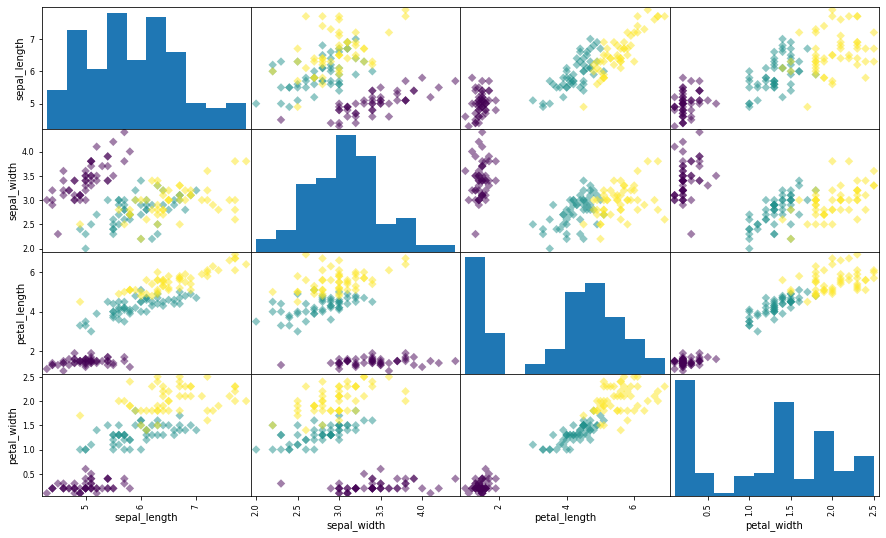

In [12]:
cores = y.astype('category').cat.codes
_=pd.plotting.scatter_matrix(x,c=cores,figsize=[15,9],marker='D')

# Passo 4: Treinamento do Modelo

In [13]:
x_train, x_test,y_train,  y_test = train_test_split(x, y,test_size = .3,stratify=y, random_state=42)

In [23]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

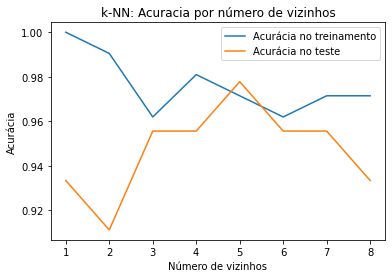

In [24]:
plt.title('k-NN: Acuracia por número de vizinhos')
plt.plot(neighbors, train_accuracy, label='Acurácia no treinamento')
plt.plot(neighbors, test_accuracy, label='Acurácia no teste')
plt.legend()
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia')
plt.show()

In [25]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

# Passo 5: Testando o Modelo

In [26]:

predicoes = model.predict(x_test)
print(predicoes)

['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor']


In [27]:
acuracia = model.score(x_test,y_test)
print(acuracia)

0.9777777777777777


# Passo 6: Deploy do Modelo

In [28]:
local_path = os.path.join(DEPLOY_PATH, DEPLOY_FILE)
joblib.dump(model,local_path)

['..\\app\\model\\finalized_model.sav']